In [2]:
!pip install rasterstats

   ---------------------------------------- 0.0/75.6 kB ? eta -:--:--
   --------------------- ------------------ 41.0/75.6 kB 960.0 kB/s eta 0:00:01
   ---------------------------------------- 75.6/75.6 kB 695.8 kB/s eta 0:00:00


In [1]:
import rasterio as ras
import matplotlib.pyplot as plt
import numpy as np
from rasterstats import zonal_stats
from rasterio.mask import mask

In [2]:
# Path to the raster file
raster_path = r"C:\Users\Yasir\Downloads\Self Learning Courses\Geopandas Work\population_indus.tif" 
# Open the file:
raster = ras.open(raster_path)
raster.mode
print(raster.mode)

raster.name
print(raster.name)  

raster.height
print(raster.height)

raster.width
print(raster.width) 

raster.transform
print(raster.transform)

raster.crs
print(raster.crs)

raster.count    
print(raster.count)

raster.closed

r
C:\Users\Yasir\Downloads\Self Learning Courses\Geopandas Work\population_indus.tif
1797
3401
| 0.01, 0.00, 63.94|
| 0.00,-0.01, 36.07|
| 0.00, 0.00, 1.00|
GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]
4


False

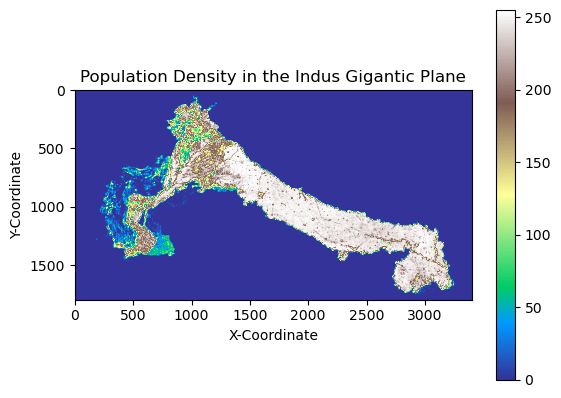

In [3]:
arr = raster.read(1)
arr = np.where(arr == -9999, np.nan, arr)
#plot
plt.imshow(arr, cmap='terrain')
plt.colorbar()  
plt.title("Population Density in the Indus Gigantic Plane")
plt.xlabel("X-Coordinate")
plt.ylabel("Y-Coordinate")
plt.show()


<Axes: >

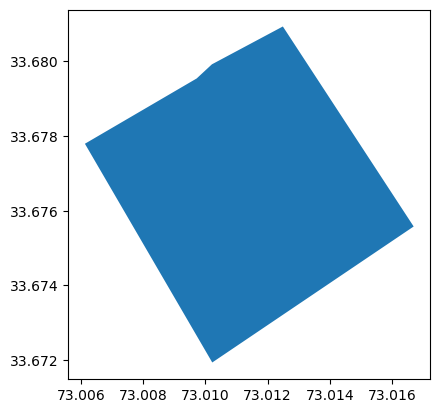

In [4]:

import geopandas as gpd
import rioxarray
# Clip the raster with the GeoDataFrame (gdf_js) geometry
geojson_file = r"C:\Users\Yasir\Downloads\Self Learning Courses\Geopandas Work\boundry.geojson"
gdf_js = gpd.read_file(geojson_file)
#plot the gdf_js
gdf_js.plot()

In [8]:
# clip the gdf_js with the raster
zs = zonal_stats(r"C:\Users\Yasir\Downloads\Data\boundry.geojson", 
                 r"C:\Users\Yasir\Downloads\Data\population_indus.tif", 
                 stats=['mean', 'std'])
print(zs)

[{'mean': 128.0, 'std': 0.0}]


c:\Users\Yasir\anaconda3\envs\practiceenv\lib\site-packages\rasterstats\io.py:335: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


In [ ]:
#   Creating Dataframe of the zs Data
data2stats_df = pd.DataFrame(zs)
data2stats_df.rename(columns={'mean':'dem_mean','std':'dem_std'}, inplace=True)

G11_geojson = pd.concat([gdf_js, data2stats_df], axis=1)

#   Plotting Data after Zonal statistic Calculations
fig, ax = plt.subplots(1, 1)
plt.title("Mean elevation per Macedonia Regions")

Macedonia_geojson.plot(column='dem_std', ax=ax, legend=True)

# x label
ax.set_xlabel('Longitude')
# y label
ax.set_ylabel('Latitude')
# show the plot
plt.show()
plt.tight_layout()